In [1]:
import pandas as pd
import numpy as np
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt
from scipy import optimize

In [41]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 

    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,exp)
    return mean(*measures),sigma(*measures)

def New_Inc(inc1, inc2):
    return np.sqrt(inc1**2 + inc2**2)

lenght_inc = 0.05 # Incertidumbre del Flexómetro.
current_inc = 0.25 # Incertidumbre del Amperímetro.

In [5]:
path1 = "C:/Users/Darck/Ondas y Fluidos/Electromagnetic Waves/data/Ondas Estacionarias.csv"

data1 = pd.read_csv(path1, sep = ";")
data1

,Corriente (microA),Distancia (cm)
0,3.5,5.00
1,32.5,5.50
2,28.5,6.75
3,23.5,8.50
4,18.5,9.50
5,19.0,11.25
6,18.0,12.75


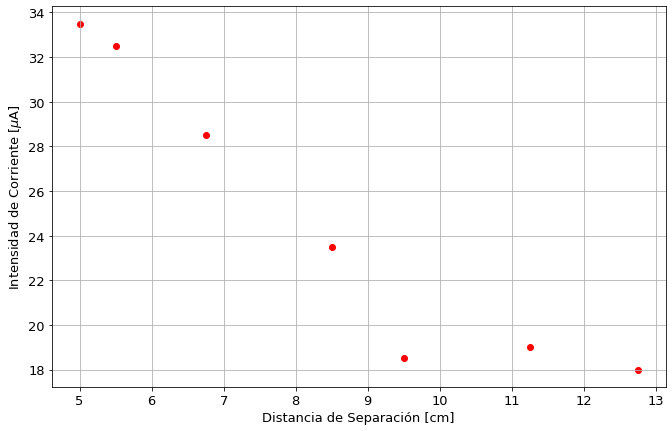

In [64]:
X1 = np.array(data1["Corriente (microA)"])
X1[0] = 33.5
Y1 = np.array(data1["Distancia (cm)"])

plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (11, 7))
plt.scatter(Y1, X1, color = "r")
plt.ylabel(r"Intensidad de Corriente [$\mu$A]", fontsize = 13)
plt.xlabel(r"Distancia de Separación [cm]", fontsize = 13)
plt.grid()
plt.savefig("Stationary.pdf")

In [67]:
wave_lenght = np.array([Y1[2] - Y1[0], Y1[3] - Y1[1], Y1[4] - Y1[2], Y1[5] - Y1[3], Y1[6] - Y1[4]])
main_value = np.sum(wave_lenght)/5

Gen_Inc = np.sqrt(5*New_Inc(lenght_inc, lenght_inc)**2)
main_value, Gen_Inc, wave_lenght

(2.7, 0.158113883008419, array([1.75, 3.  , 2.75, 2.75, 3.25]))

In [24]:
path2 = "C:/Users/Darck/Ondas y Fluidos/Electromagnetic Waves/data/Reflexión.csv"

data2 = pd.read_csv(path2, sep = ";")
data2

,Corriente (microA),Angulo
0,1.5,70
1,15.5,80
2,43.0,90
3,20.5,100
4,3.5,110


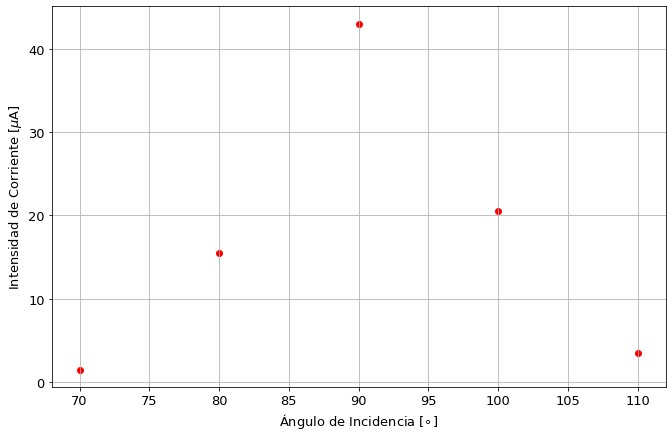

In [66]:
X2 = np.array(data2["Corriente (microA)"])
Y2 = np.array(data2["Angulo"])
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (11, 7))
plt.scatter(Y2, X2, color = "r")
plt.ylabel(r"Intensidad de Corriente [$\mu$A]", fontsize = 13)
plt.xlabel(r"Ángulo de Incidencia [$\circ$]", fontsize = 13)
plt.grid()
plt.savefig("Tendency.pdf")